In [430]:
from typing import List, Any, Tuple

import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations, chain

lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

# 2호선이 순환노선이라 시점과 종점역을 구분하기 위함.
line_seq = dict()
for line, station_str in lines.items():
    names = [s.strip() for s in station_str.split('-')]
    line_seq[line] = names
line_seq[2][-1] += '(종점)'

# G에 호선별로 노드 및 간선 추가
G=nx.Graph()
g_idx = 0
station_idx = dict() # (line, name):global_idx / g_idx -> 인접 환승역 빠른 계산
for line, seq in line_seq.items():
    prev = None
    for l_idx, name in enumerate(seq):
        curr = (line, name)
        G.add_node(curr, global_idx = g_idx, local_idx=l_idx, line=line)
        station_idx[curr] = g_idx

        if prev:
            G.add_edge(prev, curr, weight=2)
        g_idx += 1
        prev = curr

# 환승역 감지용
station_lines = defaultdict(list)
for line, seq in line_seq.items():
    for name in seq:
        station_lines[name].append(line)

# G에 환승 기능 구현
transfer_nodes = []
for station, lines in station_lines.items():
    if len(lines)>1:
        transfer_nodes.append([(line, station) for line in lines])
        for u,v in combinations(transfer_nodes[-1], 2):
            G.add_edge(u,v,weight=2)

G.add_edge((2, '시청'), (2, '시청(종점)'), weight=0.0000001) # 가중치 0 불가.. 이후 시간 계산할 때 소수점 자르기..

# #G 시각화 -> 환승, 2호선 순환 등이 잘 구현 되어있음을 확인함.
# pos = nx.kamada_kawai_layout(G)
# line_colors = {
#     1: 'blue',
#     2: 'green',
#     3: 'orange',
#     4: 'red',
#     5: 'purple'
# }
#
# for node, (x, y) in pos.items():
#     G.nodes[node]['x'] = x
#     G.nodes[node]['y'] = y
# plt.figure(figsize=(10, 10))
#
# # 노드, 간선, 레이블 그리기
# node_colors = [line_colors[G.nodes[n]['line']] for n in G.nodes()]
# nx.draw_networkx_nodes(G, pos, node_color='gray', node_size=10)
#
# edge_colors = []
# for u, v in G.edges():
#     if G.nodes[u]['line'] == G.nodes[v]['line']:
#         color = line_colors[G.nodes[u]['line']]
#     else:
#         color = 'gray'
#     edge_colors.append(color)
#
# nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
#
# # 노드 레이블
# nx.draw_networkx_labels(G, pos, font_family='Malgun Gothic', font_size=8)
#
# # 간선 가중치 표시
# # edge_labels = nx.get_edge_attributes(G, 'weight')
# # nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)
#
# plt.axis('off')
# plt.tight_layout()
# plt.show()

# TODO
# TG에 들어갈 노드들. 환승역과 시종점.
line_transfer_idx = defaultdict(list)
transfer_gidx = []
for line, name in list(chain.from_iterable(transfer_nodes)):
    line_transfer_idx[line].append((name, station_idx[(line, name)])) # line: [(name, global_idx), ...]
    transfer_gidx.append(station_idx[(line, name)])


end_gidx = [] # global idxes for end stations
for line, seq in line_seq.items():
    for l_idx, name in enumerate(seq):
        if l_idx==0 or l_idx==len(seq)-1:
            line_transfer_idx[line].append((name, station_idx[(line, name)]))
            end_gidx.append(station_idx[(line, name)])

# 호선별로 노드 및 간선 추가
TG = nx.Graph()
for line, transfer_idx in line_transfer_idx.items():
    transfer_idx.sort(key=lambda x: x[1])
    for i in range(len(transfer_idx) - 1):
        name1, idx1 = transfer_idx[i]
        name2, idx2 = transfer_idx[i + 1]

        weight = 2 * (idx2 - idx1)
        u = (line, name1)
        v = (line, name2)

        TG.add_node(u, global_idx=idx1, line=line)
        TG.add_node(v, global_idx=idx2, line=line)
        TG.add_edge(u, v, weight=weight)

for i in range(len(transfer_nodes)):
    for u,v in combinations(transfer_nodes[i], 2):
        TG.add_edge(u,v,weight=2)

TG.add_edge((2, '시청'), (2, '시청(종점)'), weight=0.0000001)
# #G 시각화 -> 환승, 2호선 순환 등이 잘 구현 되어있음을 확인함.
# pos = nx.kamada_kawai_layout(TG)
# line_colors = {
#     1: 'blue',
#     2: 'green',
#     3: 'orange',
#     4: 'red',
#     5: 'purple'
# }
#
# for node, (x, y) in pos.items():
#     TG.nodes[node]['x'] = x
#     TG.nodes[node]['y'] = y
# plt.figure(figsize=(10, 10))
#
# # 노드, 간선, 레이블 그리기
# node_colors = [line_colors[TG.nodes[n]['line']] for n in TG.nodes()]
# nx.draw_networkx_nodes(TG, pos, node_color='gray', node_size=10)
#
# edge_colors = []
# for u, v in TG.edges():
#     if G.nodes[u]['line'] == TG.nodes[v]['line']:
#         color = line_colors[TG.nodes[u]['line']]
#     else:
#         color = 'gray'
#     edge_colors.append(color)
#
# nx.draw_networkx_edges(TG, pos, edge_color=edge_colors, width=2)
#
# # 노드 레이블
# nx.draw_networkx_labels(TG, pos, font_family='Malgun Gothic', font_size=8)
#
# # 간선 가중치 표시
# edge_labels = nx.get_edge_attributes(TG, 'weight')
# nx.draw_networkx_edge_labels(TG, pos, edge_labels, font_size=7)
#
# plt.axis('off')
# plt.tight_layout()
# plt.show()

gidx_transfer = {
    g_idx: (line, name)
    for line, item in line_transfer_idx.items()
    for name, g_idx in item
}

node_near_transfer = dict()
keys = sorted(gidx_transfer.keys())

for k1, k2 in zip(keys[:-1], keys[1:]):
    g_idx1, transfer_node1 = k1, gidx_transfer[k1]
    g_idx2, transfer_node2 = k2, gidx_transfer[k2]

    for i in range(g_idx1, g_idx2):
        if g_idx1 in end_gidx:
            node_near_transfer[i]  = (transfer_node2)
        elif g_idx2 in end_gidx:
            node_near_transfer[i]  = (transfer_node1)
        else: node_near_transfer[i] = (transfer_node1, transfer_node2)

node_near_transfer[99] = ((2, '시청'), (2, '을지로3가'))

def near_transfer(s, t):
    idx1 = station_idx[s]
    idx2 = station_idx[t]

    if idx1 in transfer_gidx: near_s = (s)
    else: near_s = node_near_transfer[idx1]

    if idx2 in transfer_gidx: near_t = (t)
    else: near_t = node_near_transfer[idx2]

    return [near_s, near_t]

# transfer to transfer APSP
t2t_dist = dict(nx.all_pairs_dijkstra_path_length(TG, weight='weight'))
t2t_path = dict(nx.all_pairs_dijkstra_path(TG, weight='weight'))

# def two_layer_sp(s: Tuple[Any, Any], t: Tuple[Any, Any]) -> Tuple[List[Any], float]:
#     if s == t:
#         return [s], 0.0

#     near_s, near_t = near_transfer(s, t)
#     # 리스트 형태로 통일
#     src_trans = near_s if isinstance(near_s, (list, tuple)) else [near_s]
#     tgt_trans = near_t if isinstance(near_t, (list, tuple)) else [near_t]

#     # 같은 환승 구간 내
#     if src_trans == tgt_trans and len(src_trans) == 1:
#         path = nx.shortest_path(G, s, t, weight='weight')
#         dist = nx.shortest_path_length(G, s, t, weight='weight')
#         return path, dist

#     best_path, best_dist = [], float('inf')
#     for ts in src_trans:
#         # s -> ts
#         path_s = nx.shortest_path(G, s, ts, weight='weight')
#         dist_s = nx.shortest_path_length(G, s, ts, weight='weight')
#         for tt in tgt_trans:
#             if ts == tt:
#                 # ts -> t 직결
#                 path_t = nx.shortest_path(G, ts, t, weight='weight')
#                 dist_t = nx.shortest_path_length(G, ts, t, weight='weight')
#                 cur_path = path_s + path_t[1:]
#                 cur_dist = dist_s + dist_t
#             else:
#                 # ts -> tt (환승 전용 TG) -> t
#                 mid_path = t2t_path[ts][tt]
#                 mid_dist = t2t_dist[ts][tt]
#                 path_t = nx.shortest_path(G, tt, t, weight='weight')
#                 dist_t = nx.shortest_path_length(G, tt, t, weight='weight')
#                 cur_path = path_s + mid_path[1:] + path_t[1:]
#                 cur_dist = dist_s + mid_dist + dist_t

#             if cur_dist < best_dist:
#                 best_dist, best_path = cur_dist, cur_path

#     return best_path, int(best_dist)

In [450]:
nodes_list = list(station_idx.keys())
def two_layer_sp(x,y) -> Tuple[List[Any], int]:
    if x == y: return [x], 0

    near_x, near_y = near_transfer(x,y)
    xi, yi = station_idx[x], station_idx[y]
    idx1, idx2, not_reverse = (xi, yi, 1) if xi < yi else (xi, yi, -1)
    if near_x == near_y: # 같은 subline 내에 두 역이 존재
        # path = list(G.subgraph(s,t).nodes())
        path = nodes_list[idx1:idx2+1]
        return path[::not_reverse], 2*(idx2 - idx1)
    else:
        for xt in near_x:
            xti = station_idx[t]
            
            x2t_path = nodes_list[idx1:idx2+1]
            x2t_dist = 2*(idx2-idx1)
            for yt in near_t:
                y2t_path = nodes_list[idx1:idx2+1]                
                

In [464]:
p = nodes_list[0:3]
p

[(1, '소요산'), (1, '동두천'), (1, '보산')]

In [468]:
p[::1]

[(1, '소요산'), (1, '동두천'), (1, '보산')]

In [436]:
two_layer_sp((1, '군포'), (1, '군포))

([(1, '군포')], 0)

In [420]:
two_layer_sp((1, '금정'), (1, '금정'))

([(1, '금정')], 0.0)

In [452]:
two_layer_sp((1, '명학'),(1, '독산'))

([(1, '독산'), (1, '금천구청'), (1, '석수'), (1, '관악'), (1, '안양'), (1, '명학')], 10)

In [343]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations, chain

lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

# 2호선이 순환노선이라 시점과 종점역을 구분하기 위함.
line_seq = dict()
for line, station_str in lines.items():
    names = [s.strip() for s in station_str.split('-')]
    line_seq[line] = names
line_seq[2][-1] += '(종점)'

# G에 호선별로 노드 및 간선 추가
G=nx.Graph()
g_idx = 0
station_idx = dict() # (line, name):global_idx / g_idx -> 인접 환승역 빠른 계산, l_idx -> 시종점역을 인접 환승역에서 제외하기 위함
for line, seq in line_seq.items():
    prev = None
    for l_idx, name in enumerate(seq):
        curr = (line, name)
        G.add_node(curr, global_idx = g_idx, local_idx=l_idx, line=line)
        station_idx[curr] = g_idx

        if prev:
            G.add_edge(prev, curr, weight=2)
        g_idx += 1
        prev = curr

# 환승역 감지용
station_lines = defaultdict(list)
for line, seq in line_seq.items():
    for name in seq:
        station_lines[name].append(line)

# G에 환승 기능 구현
transfer_nodes = []
for station, lines in station_lines.items():
    if len(lines)>1:
        transfer_nodes.append([(line, station) for line in lines])
        for u,v in combinations(transfer_nodes[-1], 2):
            G.add_edge(u,v,weight=2)

G.add_edge((2, '시청'), (2, '시청(종점)'), weight=0.0000001) # 가중치 0 불가.. 이후 시간 계산할 때 소수점 자르기..

##### 접기

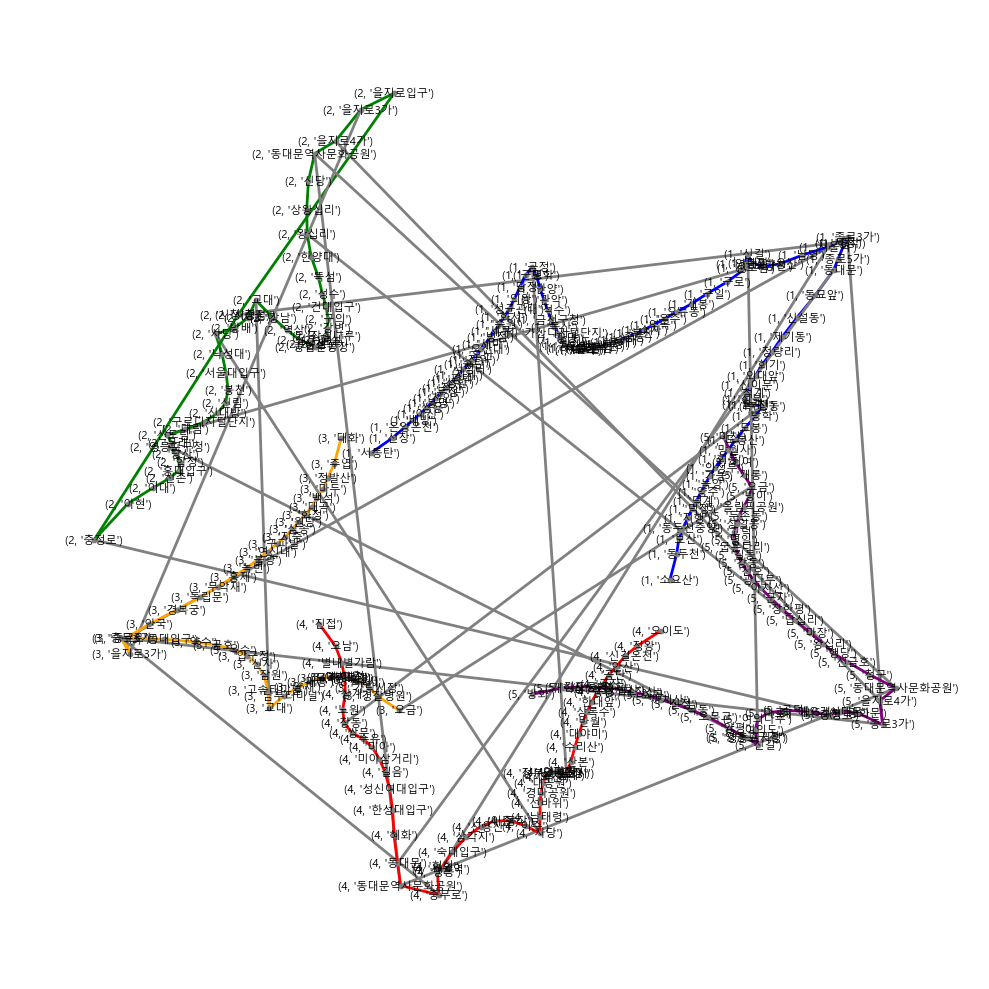

In [168]:
#G 시각화 -> 환승, 2호선 순환 등이 잘 구현 되어있음을 확인함.
pos = nx.kamada_kawai_layout(G)
line_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red',
    5: 'purple'
}

for node, (x, y) in pos.items():
    G.nodes[node]['x'] = x
    G.nodes[node]['y'] = y
plt.figure(figsize=(10, 10))

# 노드, 간선, 레이블 그리기
node_colors = [line_colors[G.nodes[n]['line']] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color='gray', node_size=10)

edge_colors = []
for u, v in G.edges():
    if G.nodes[u]['line'] == G.nodes[v]['line']:
        color = line_colors[G.nodes[u]['line']]
    else:
        color = 'gray'
    edge_colors.append(color)

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# 노드 레이블
nx.draw_networkx_labels(G, pos, font_family='Malgun Gothic', font_size=8)

# 간선 가중치 표시
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

plt.axis('off')
plt.tight_layout()
plt.show()

#### 다시 시작

In [399]:
# TG에 들어갈 노드들. 환승역과 시종점.
line_transfer_idx = defaultdict(list)
transfer_gidx = []
for line, name in list(chain.from_iterable(transfer_nodes)):
    line_transfer_idx[line].append((name, station_idx[(line, name)])) # line: [(name, global_idx), ...]
    transfer_gidx.append(station_idx[(line, name)])


end_gidx = [] # global idxes for end stations
for line, seq in line_seq.items():
    for l_idx, name in enumerate(seq):
        if l_idx==0 or l_idx==len(seq)-1:
            line_transfer_idx[line].append((name, station_idx[(line, name)]))
            end_gidx.append(station_idx[(line, name)])

In [311]:
line_transfer_idx

defaultdict(list,
            {1: [('소요산', (0, 0)),
              ('창동', (16, 16)),
              ('동대문', (28, 28)),
              ('종로3가', (30, 30)),
              ('시청', (32, 32)),
              ('서울역', (33, 33)),
              ('신길', (38, 38)),
              ('신도림', (40, 40)),
              ('금정', (70, 70)),
              ('서동탄', (97, 97))],
             4: [('진접', (185, 0)),
              ('창동', (191, 6)),
              ('동대문', (200, 15)),
              ('동대문역사문화공원', (201, 16)),
              ('충무로', (202, 17)),
              ('서울역', (205, 20)),
              ('사당', (212, 27)),
              ('금정', (222, 37)),
              ('오이도', (235, 50))],
             3: [('대화', (142, 0)),
              ('종로3가', (161, 19)),
              ('을지로3가', (162, 20)),
              ('충무로', (163, 21)),
              ('교대', (172, 30)),
              ('오금', (184, 42)),
              ('오금', (184, 42))],
             5: [('방화', (236, 0)),
              ('영등포구청', (249, 13)),
              ('신길', (251, 15)),

In [347]:
# 호선별로 노드 및 간선 추가
TG = nx.Graph()
for line, transfer_idx in line_transfer_idx.items():
    transfer_idx.sort(key=lambda x: x[1]) # 이거나 그냥 x[1]이나 같지 않나 튜플 정렬이면? 그러면 line_transfer_idx 정의를 인덱스를 앞으로 둘까?
    for i in range(len(transfer_idx) - 1):
        name1, idx1 = transfer_idx[i]
        name2, idx2 = transfer_idx[i + 1]

        weight = 2 * (idx2 - idx1)
        u = (line, name1)
        v = (line, name2)

        TG.add_node(u, global_idx=idx1, line=line)
        TG.add_node(v, global_idx=idx2, line=line)
        TG.add_edge(u, v, weight=weight)

for i in range(len(transfer_nodes)):
    for u,v in combinations(transfer_nodes[i], 2):
        TG.add_edge(u,v,weight=2)

TG.add_edge((2, '시청'), (2, '시청(종점)'), weight=0.0000001)

In [349]:
line_transfer_idx

defaultdict(list,
            {1: [('소요산', 0),
              ('창동', 16),
              ('동대문', 28),
              ('종로3가', 30),
              ('시청', 32),
              ('서울역', 33),
              ('신길', 38),
              ('신도림', 40),
              ('금정', 70),
              ('서동탄', 97)],
             4: [('진접', 185),
              ('창동', 191),
              ('동대문', 200),
              ('동대문역사문화공원', 201),
              ('충무로', 202),
              ('서울역', 205),
              ('사당', 212),
              ('금정', 222),
              ('오이도', 235)],
             3: [('대화', 142),
              ('종로3가', 161),
              ('을지로3가', 162),
              ('충무로', 163),
              ('교대', 172),
              ('오금', 184),
              ('오금', 184)],
             5: [('방화', 236),
              ('영등포구청', 249),
              ('신길', 251),
              ('충정로', 257),
              ('종로3가', 260),
              ('을지로4가', 261),
              ('동대문역사문화공원', 262),
              ('왕십리', 266),
              ('오금'

In [ ]:
for line, item in line_transfer_idx.items():
    for name, 

In [373]:
gidx_transfer = {
    g_idx: (line, name)
    for line, item in line_transfer_idx.items()
    for name, g_idx in item
}

In [375]:
gidx_transfer

{16: (1, '창동'),
 28: (1, '동대문'),
 30: (1, '종로3가'),
 32: (1, '시청'),
 33: (1, '서울역'),
 38: (1, '신길'),
 40: (1, '신도림'),
 70: (1, '금정'),
 0: (1, '소요산'),
 97: (1, '서동탄'),
 191: (4, '창동'),
 200: (4, '동대문'),
 205: (4, '서울역'),
 222: (4, '금정'),
 201: (4, '동대문역사문화공원'),
 212: (4, '사당'),
 202: (4, '충무로'),
 185: (4, '진접'),
 235: (4, '오이도'),
 161: (3, '종로3가'),
 162: (3, '을지로3가'),
 172: (3, '교대'),
 163: (3, '충무로'),
 184: (3, '오금'),
 142: (3, '대화'),
 260: (5, '종로3가'),
 251: (5, '신길'),
 261: (5, '을지로4가'),
 262: (5, '동대문역사문화공원'),
 266: (5, '왕십리'),
 249: (5, '영등포구청'),
 257: (5, '충정로'),
 283: (5, '오금'),
 236: (5, '방화'),
 286: (5, '마천'),
 98: (2, '시청'),
 131: (2, '신도림'),
 100: (2, '을지로3가'),
 101: (2, '을지로4가'),
 102: (2, '동대문역사문화공원'),
 105: (2, '왕십리'),
 120: (2, '교대'),
 123: (2, '사당'),
 133: (2, '영등포구청'),
 140: (2, '충정로'),
 141: (2, '시청(종점)')}

In [389]:
node_near_transfer = dict()
keys = sorted(gidx_transfer.keys())

for k1, k2 in zip(keys, keys[1:]):
    print(k1, k2)
    g_idx1, transfer_node1 = k1, gidx_transfer[k1]
    g_idx2, transfer_node2 = k2, gidx_transfer[k2]

    for i in range(g_idx1+1, g_idx2):
        if g_idx1 in end_gidx: 
            node_near_transfer[i] = (transfer_node2)
        elif g_idx2 in end_gidx:
            node_near_transfer[i] = (transfer_node1)
        else: node_near_transfer[i] = (transfer_node1, transfer_node2)

0 16
16 28
28 30
30 32
32 33
33 38
38 40
40 70
70 97
97 98
98 100
100 101
101 102
102 105
105 120
120 123
123 131
131 133
133 140
140 141
141 142
142 161
161 162
162 163
163 172
172 184
184 185
185 191
191 200
200 201
201 202
202 205
205 212
212 222
222 235
235 236
236 249
249 251
251 257
257 260
260 261
261 262
262 266
266 283
283 286


In [395]:
node_near_transfer[99] = ((2, '시청'), (2, '을지로3가'))

In [397]:
node_near_transfer # 을지로 입구면 시청, 을지로3가여야함. 아오 2호선

{1: (1, '창동'),
 2: (1, '창동'),
 3: (1, '창동'),
 4: (1, '창동'),
 5: (1, '창동'),
 6: (1, '창동'),
 7: (1, '창동'),
 8: (1, '창동'),
 9: (1, '창동'),
 10: (1, '창동'),
 11: (1, '창동'),
 12: (1, '창동'),
 13: (1, '창동'),
 14: (1, '창동'),
 15: (1, '창동'),
 17: ((1, '창동'), (1, '동대문')),
 18: ((1, '창동'), (1, '동대문')),
 19: ((1, '창동'), (1, '동대문')),
 20: ((1, '창동'), (1, '동대문')),
 21: ((1, '창동'), (1, '동대문')),
 22: ((1, '창동'), (1, '동대문')),
 23: ((1, '창동'), (1, '동대문')),
 24: ((1, '창동'), (1, '동대문')),
 25: ((1, '창동'), (1, '동대문')),
 26: ((1, '창동'), (1, '동대문')),
 27: ((1, '창동'), (1, '동대문')),
 29: ((1, '동대문'), (1, '종로3가')),
 31: ((1, '종로3가'), (1, '시청')),
 34: ((1, '서울역'), (1, '신길')),
 35: ((1, '서울역'), (1, '신길')),
 36: ((1, '서울역'), (1, '신길')),
 37: ((1, '서울역'), (1, '신길')),
 39: ((1, '신길'), (1, '신도림')),
 41: ((1, '신도림'), (1, '금정')),
 42: ((1, '신도림'), (1, '금정')),
 43: ((1, '신도림'), (1, '금정')),
 44: ((1, '신도림'), (1, '금정')),
 45: ((1, '신도림'), (1, '금정')),
 46: ((1, '신도림'), (1, '금정')),
 47: ((1, '신도림'), (1, '금정')),
 48: ((1, '신도림')

In [393]:
station_idx

{(1, '소요산'): 0,
 (1, '동두천'): 1,
 (1, '보산'): 2,
 (1, '동두천중앙'): 3,
 (1, '지행'): 4,
 (1, '덕정'): 5,
 (1, '덕계'): 6,
 (1, '양주'): 7,
 (1, '녹양'): 8,
 (1, '가능'): 9,
 (1, '의정부'): 10,
 (1, '회룡'): 11,
 (1, '망월사'): 12,
 (1, '도봉산'): 13,
 (1, '도봉'): 14,
 (1, '방학'): 15,
 (1, '창동'): 16,
 (1, '녹천'): 17,
 (1, '월계'): 18,
 (1, '성북'): 19,
 (1, '석계'): 20,
 (1, '신이문'): 21,
 (1, '외대앞'): 22,
 (1, '회기'): 23,
 (1, '청량리'): 24,
 (1, '제기동'): 25,
 (1, '신설동'): 26,
 (1, '동묘앞'): 27,
 (1, '동대문'): 28,
 (1, '종로5가'): 29,
 (1, '종로3가'): 30,
 (1, '종각'): 31,
 (1, '시청'): 32,
 (1, '서울역'): 33,
 (1, '남영'): 34,
 (1, '용산'): 35,
 (1, '노량진'): 36,
 (1, '대방'): 37,
 (1, '신길'): 38,
 (1, '영등포'): 39,
 (1, '신도림'): 40,
 (1, '구로'): 41,
 (1, '구일'): 42,
 (1, '개봉'): 43,
 (1, '오류동'): 44,
 (1, '온수'): 45,
 (1, '역곡'): 46,
 (1, '소사'): 47,
 (1, '부천'): 48,
 (1, '중동'): 49,
 (1, '송내'): 50,
 (1, '부개'): 51,
 (1, '부평'): 52,
 (1, '백운'): 53,
 (1, '동암'): 54,
 (1, '간석'): 55,
 (1, '주안'): 56,
 (1, '도화'): 57,
 (1, '제물포'): 58,
 (1, '도원'): 59,
 (1, '동인천'): 60,
 (1, '인천

In [404]:
def transfer_apsp(s,t): # (line, station_name)
    if s==t: return [s]
        
    idx1 = station_idx[s]
    idx2 = station_idx[t]
    line1, name1 = s
    line2, name2 = t
    
    if idx1 in transfer_gidx: near_s = (s)
    else: near_s = node_near_transfer[idx1]
    if idx2 in transfer_gidx: near_t = (t)
    else: near_t = node_near_transfer[idx2]

    print(near_s, near_t)

In [406]:
transfer_apsp((1, '창동'), (1, '양주'))

(1, '창동') (1, '창동')


In [234]:
line_transfer_idx = defaultdict(list)
for line, name in list(chain.from_iterable(transfer_nodes)):
    line_transfer_idx[line].append((name, station_idx[(line, name)]))

In [236]:
for line, seq in line_seq.items():
    for l_idx, name in enumerate(seq):
        if l_idx==0 or l_idx==len(seq)-1:
            line_transfer_idx[line].append((name, station_idx[(line, name)]))

TG에 들어갈 노드들 구하는 부분

In [211]:
line_transfer_idx

defaultdict(list,
            {1: [('창동', 16),
              ('동대문', 28),
              ('종로3가', 30),
              ('시청', 32),
              ('서울역', 33),
              ('신길', 38),
              ('신도림', 40),
              ('금정', 70),
              ('소요산', 0),
              ('서동탄', 97)],
             4: [('창동', 6),
              ('동대문', 15),
              ('서울역', 20),
              ('금정', 37),
              ('동대문역사문화공원', 16),
              ('사당', 27),
              ('충무로', 17),
              ('진접', 0),
              ('오이도', 50)],
             3: [('종로3가', 19),
              ('을지로3가', 20),
              ('교대', 30),
              ('충무로', 21),
              ('오금', 42),
              ('대화', 0),
              ('오금', 42)],
             5: [('종로3가', 24),
              ('신길', 15),
              ('을지로4가', 25),
              ('동대문역사문화공원', 26),
              ('왕십리', 30),
              ('영등포구청', 13),
              ('충정로', 21),
              ('오금', 47),
              ('방화', 0),
              ('마천', 

In [238]:
TG = nx.Graph()
for line, transfer_idx in line_transfer_idx.items():
    transfer_idx.sort(key=lambda x:x[1])
    for i in range(len(transfer_idx)-1):
        name1, idx1 = transfer_idx[i]
        name2, idx2 = transfer_idx[i+1]

        weight = 2*(idx2-idx1)
        u=(line, name1)
        v=(line, name2)

        TG.add_node(u, global_idx = idx1, line=line)
        TG.add_node(v, global_idx = idx2, line=line)
        TG.add_edge(u,v,weight=weight)
    

호선 별로 노드 추가하고 가중치 구해서 간선까지 추가함

In [259]:
transfer_nodes

[[(1, '창동'), (4, '창동')],
 [(1, '동대문'), (4, '동대문')],
 [(1, '종로3가'), (3, '종로3가'), (5, '종로3가')],
 [(1, '시청'), (2, '시청')],
 [(1, '서울역'), (4, '서울역')],
 [(1, '신길'), (5, '신길')],
 [(1, '신도림'), (2, '신도림')],
 [(1, '금정'), (4, '금정')],
 [(2, '을지로3가'), (3, '을지로3가')],
 [(2, '을지로4가'), (5, '을지로4가')],
 [(2, '동대문역사문화공원'), (4, '동대문역사문화공원'), (5, '동대문역사문화공원')],
 [(2, '왕십리'), (5, '왕십리')],
 [(2, '교대'), (3, '교대')],
 [(2, '사당'), (4, '사당')],
 [(2, '영등포구청'), (5, '영등포구청')],
 [(2, '충정로'), (5, '충정로')],
 [(3, '충무로'), (4, '충무로')],
 [(3, '오금'), (5, '오금')]]

In [273]:
for i in range(len(transfer_nodes)):
    for u,v in combinations(transfer_nodes[i], 2):
        TG.add_edge(u,v,weight=2)

In [268]:
TG.add_edge((2, '시청'), (2, '시청(종점)'), weight=2) 

환승 구현하고 2호선 순환 연결지음.

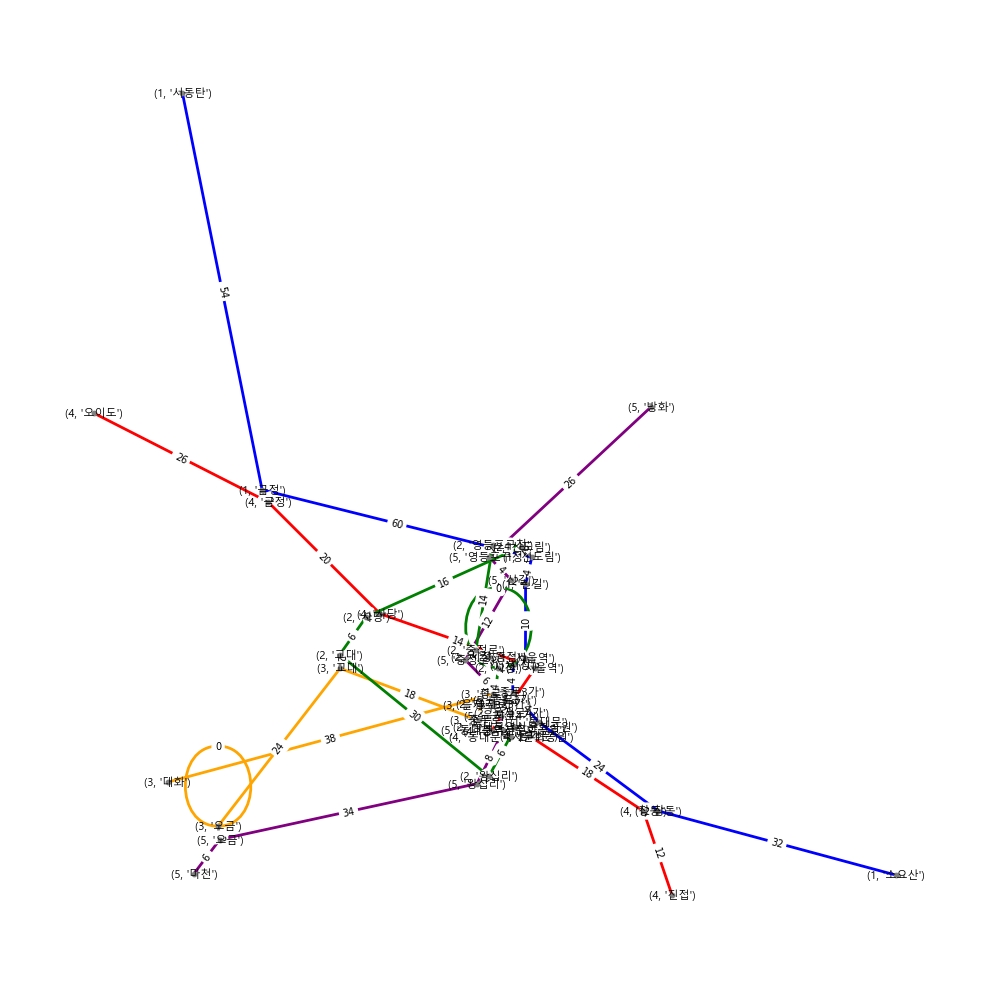

In [271]:
#G 시각화 -> 환승, 2호선 순환 등이 잘 구현 되어있음을 확인함.
pos = nx.kamada_kawai_layout(TG)
line_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red',
    5: 'purple'
}

for node, (x, y) in pos.items():
    TG.nodes[node]['x'] = x
    TG.nodes[node]['y'] = y
plt.figure(figsize=(10, 10))

# 노드, 간선, 레이블 그리기
node_colors = [line_colors[TG.nodes[n]['line']] for n in TG.nodes()]
nx.draw_networkx_nodes(TG, pos, node_color='gray', node_size=10)

edge_colors = []
for u, v in TG.edges():
    if G.nodes[u]['line'] == TG.nodes[v]['line']:
        color = line_colors[TG.nodes[u]['line']]
    else:
        color = 'gray'
    edge_colors.append(color)

nx.draw_networkx_edges(TG, pos, edge_color=edge_colors, width=2)

# 노드 레이블
nx.draw_networkx_labels(TG, pos, font_family='Malgun Gothic', font_size=8)

# 간선 가중치 표시
edge_labels = nx.get_edge_attributes(TG, 'weight')
nx.draw_networkx_edge_labels(TG, pos, edge_labels, font_size=7)

plt.axis('off')
plt.tight_layout()
plt.show()

In [74]:
import networkx as nx
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt

In [76]:
lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

정의된 데이터

In [78]:
line_seq = dict()
for line, station_str in lines.items():
    names = [s.strip() for s in station_str.split('-')]
    line_seq[line] = names

In [80]:
line_seq[2][-1] += "(종점)"

In [82]:
line_seq

{1: ['소요산',
  '동두천',
  '보산',
  '동두천중앙',
  '지행',
  '덕정',
  '덕계',
  '양주',
  '녹양',
  '가능',
  '의정부',
  '회룡',
  '망월사',
  '도봉산',
  '도봉',
  '방학',
  '창동',
  '녹천',
  '월계',
  '성북',
  '석계',
  '신이문',
  '외대앞',
  '회기',
  '청량리',
  '제기동',
  '신설동',
  '동묘앞',
  '동대문',
  '종로5가',
  '종로3가',
  '종각',
  '시청',
  '서울역',
  '남영',
  '용산',
  '노량진',
  '대방',
  '신길',
  '영등포',
  '신도림',
  '구로',
  '구일',
  '개봉',
  '오류동',
  '온수',
  '역곡',
  '소사',
  '부천',
  '중동',
  '송내',
  '부개',
  '부평',
  '백운',
  '동암',
  '간석',
  '주안',
  '도화',
  '제물포',
  '도원',
  '동인천',
  '인천',
  '광명',
  '가산디지털단지',
  '독산',
  '금천구청',
  '석수',
  '관악',
  '안양',
  '명학',
  '금정',
  '군포',
  '당정',
  '의왕',
  '성균관대',
  '화서',
  '수원',
  '세류',
  '병점',
  '세마',
  '오산대',
  '오산',
  '진위',
  '송탄',
  '서정리',
  '지제',
  '평택',
  '성환',
  '직산',
  '두정',
  '천안',
  '봉명',
  '쌍용',
  '아산',
  '배방',
  '온양온천',
  '신창',
  '서동탄'],
 2: ['시청',
  '을지로입구',
  '을지로3가',
  '을지로4가',
  '동대문역사문화공원',
  '신당',
  '상왕십리',
  '왕십리',
  '한양대',
  '뚝섬',
  '성수',
  '건대입구',
  '구의',
  '강변',
  '잠실나루',
  '잠실',
  '신천',
  '종합운동장'

2호선 순환선으로 계속 문제가 발생해 시점 시청역과 종점 시청역을 구분함. 

In [124]:
G=nx.Graph()
g_idx = 0
for line, seq in line_seq.items():
    prev = None
    for l_idx, name in enumerate(seq):
        curr = (line, name)
        G.add_node(curr, global_idx=g_idx, local_idx=l_idx, line=line)

        if prev:
            G.add_edge(prev, curr, weight=2)
        g_idx += 1
        prev = curr

In [126]:
for n in G.nodes(data=True):
    print(n)

((1, '소요산'), {'global_idx': 0, 'local_idx': 0, 'line': 1})
((1, '동두천'), {'global_idx': 1, 'local_idx': 1, 'line': 1})
((1, '보산'), {'global_idx': 2, 'local_idx': 2, 'line': 1})
((1, '동두천중앙'), {'global_idx': 3, 'local_idx': 3, 'line': 1})
((1, '지행'), {'global_idx': 4, 'local_idx': 4, 'line': 1})
((1, '덕정'), {'global_idx': 5, 'local_idx': 5, 'line': 1})
((1, '덕계'), {'global_idx': 6, 'local_idx': 6, 'line': 1})
((1, '양주'), {'global_idx': 7, 'local_idx': 7, 'line': 1})
((1, '녹양'), {'global_idx': 8, 'local_idx': 8, 'line': 1})
((1, '가능'), {'global_idx': 9, 'local_idx': 9, 'line': 1})
((1, '의정부'), {'global_idx': 10, 'local_idx': 10, 'line': 1})
((1, '회룡'), {'global_idx': 11, 'local_idx': 11, 'line': 1})
((1, '망월사'), {'global_idx': 12, 'local_idx': 12, 'line': 1})
((1, '도봉산'), {'global_idx': 13, 'local_idx': 13, 'line': 1})
((1, '도봉'), {'global_idx': 14, 'local_idx': 14, 'line': 1})
((1, '방학'), {'global_idx': 15, 'local_idx': 15, 'line': 1})
((1, '창동'), {'global_idx': 16, 'local_idx': 16, 'lin

G node 정의 완, edge 환승 제외 정의 완

In [129]:
station_lines = defaultdict(list)
for line, seq in line_seq.items():
    for name in seq:
        station_lines[name].append(line)

In [131]:
station_lines

defaultdict(list,
            {'소요산': [1],
             '동두천': [1],
             '보산': [1],
             '동두천중앙': [1],
             '지행': [1],
             '덕정': [1],
             '덕계': [1],
             '양주': [1],
             '녹양': [1],
             '가능': [1],
             '의정부': [1],
             '회룡': [1],
             '망월사': [1],
             '도봉산': [1],
             '도봉': [1],
             '방학': [1],
             '창동': [1, 4],
             '녹천': [1],
             '월계': [1],
             '성북': [1],
             '석계': [1],
             '신이문': [1],
             '외대앞': [1],
             '회기': [1],
             '청량리': [1],
             '제기동': [1],
             '신설동': [1],
             '동묘앞': [1],
             '동대문': [1, 4],
             '종로5가': [1],
             '종로3가': [1, 3, 5],
             '종각': [1],
             '시청': [1, 2],
             '서울역': [1, 4],
             '남영': [1],
             '용산': [1],
             '노량진': [1],
             '대방': [1],
             '신길': [1, 5],
    

station_name: lines(list) 로 구성된 station_lines 딕셔너리. -> len(lines)로 환승역 구분 가능.

In [154]:
transfer_NODES = []
for station, lines in station_lines.items():
    if len(lines)>1:
        transfer_nodes = [(line, station) for line in lines]
        for u,v in combinations(transfer_nodes, 2):
            G.add_edge(u,v,weight=2)

In [156]:
G.add_edge((2, '시청'), (2, '시청(종점)'), weight=0)

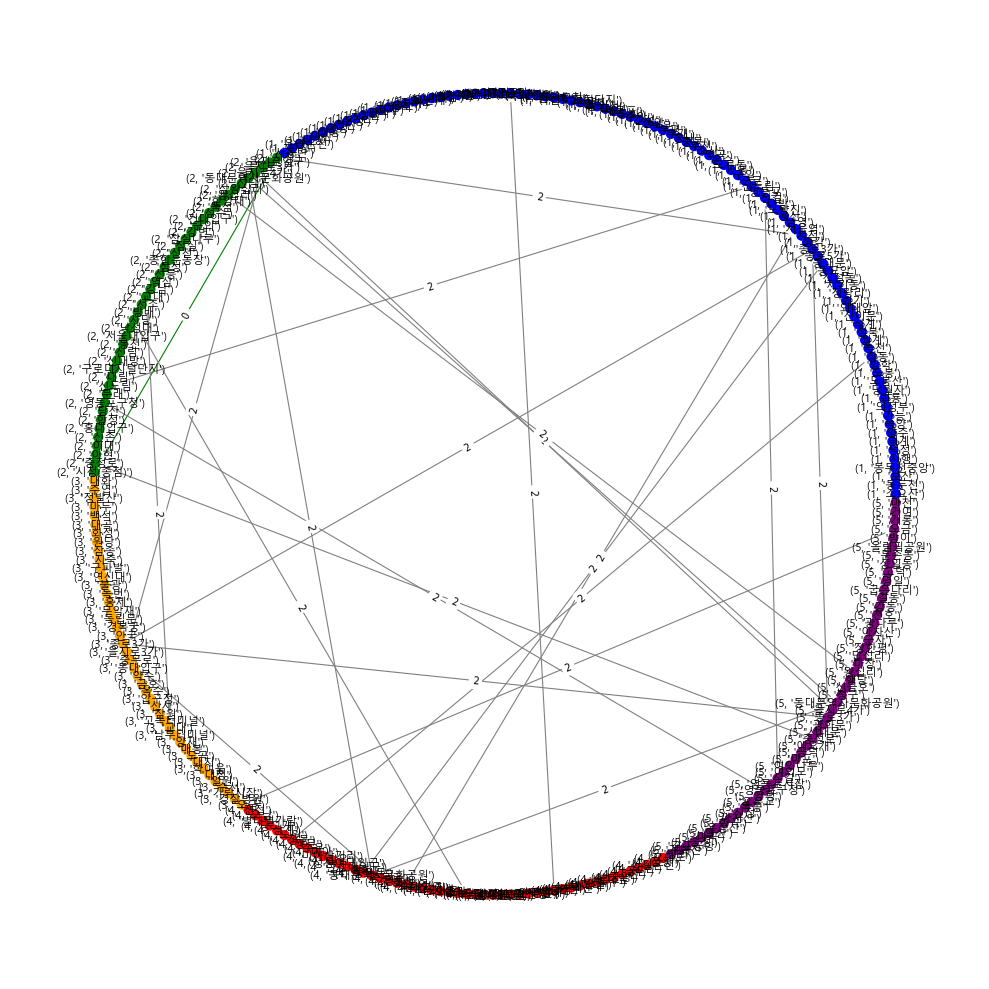

In [158]:
pos = nx.kamada_kawai_layout(G)

line_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red',
    5: 'purple'
}

for node, (x, y) in pos.items():
    G.nodes[node]['x'] = x
    G.nodes[node]['y'] = y
plt.figure(figsize=(10, 10))

# 노드, 간선, 레이블 그리기
node_colors = [line_colors[G.nodes[n]['line']] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=40)

edge_colors = []
for u, v in G.edges():
    if G.nodes[u]['line'] == G.nodes[v]['line']:
        color = line_colors[G.nodes[u]['line']]
    else:
        color = 'gray'
    edge_colors.append(color)

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=0.8)

# 노드 레이블
nx.draw_networkx_labels(G, pos, font_family='Malgun Gothic', font_size=8)

# 간선 가중치 표시
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
G = nx.Graph()
TG = nx.Graph()
line_sequences = dict()
transfer_idx = dict()
global_idx = 0

In [26]:
for line, station_str in lines.items():
    names = [s.strip() for s in station_str.split('-')]
    N = len(names)
    for i, name in enumerate(names):
        node = (line, name)
        G.add_node(node, g_idx = global_idx, l_idx = i, line=line)
        if len(station_lines[name])>1 or i==0 or i==N-1:
            TG.add_node(node, g_idx=global_idx, l_idx=i, line=line)
        global_idx += 1
    line_sequences[line] = seq

In [28]:
for n in G.nodes(data=True):
    print(n)

((1, '소요산'), {'g_idx': 0, 'l_idx': 0, 'line': 1})
((1, '동두천'), {'g_idx': 1, 'l_idx': 1, 'line': 1})
((1, '보산'), {'g_idx': 2, 'l_idx': 2, 'line': 1})
((1, '동두천중앙'), {'g_idx': 3, 'l_idx': 3, 'line': 1})
((1, '지행'), {'g_idx': 4, 'l_idx': 4, 'line': 1})
((1, '덕정'), {'g_idx': 5, 'l_idx': 5, 'line': 1})
((1, '덕계'), {'g_idx': 6, 'l_idx': 6, 'line': 1})
((1, '양주'), {'g_idx': 7, 'l_idx': 7, 'line': 1})
((1, '녹양'), {'g_idx': 8, 'l_idx': 8, 'line': 1})
((1, '가능'), {'g_idx': 9, 'l_idx': 9, 'line': 1})
((1, '의정부'), {'g_idx': 10, 'l_idx': 10, 'line': 1})
((1, '회룡'), {'g_idx': 11, 'l_idx': 11, 'line': 1})
((1, '망월사'), {'g_idx': 12, 'l_idx': 12, 'line': 1})
((1, '도봉산'), {'g_idx': 13, 'l_idx': 13, 'line': 1})
((1, '도봉'), {'g_idx': 14, 'l_idx': 14, 'line': 1})
((1, '방학'), {'g_idx': 15, 'l_idx': 15, 'line': 1})
((1, '창동'), {'g_idx': 16, 'l_idx': 16, 'line': 1})
((1, '녹천'), {'g_idx': 17, 'l_idx': 17, 'line': 1})
((1, '월계'), {'g_idx': 18, 'l_idx': 18, 'line': 1})
((1, '성북'), {'g_idx': 19, 'l_idx': 19, 'lin

In [30]:
for n in TG.nodes(data=True):
    print(n)

((1, '소요산'), {'g_idx': 0, 'l_idx': 0, 'line': 1})
((1, '창동'), {'g_idx': 16, 'l_idx': 16, 'line': 1})
((1, '동대문'), {'g_idx': 28, 'l_idx': 28, 'line': 1})
((1, '종로3가'), {'g_idx': 30, 'l_idx': 30, 'line': 1})
((1, '시청'), {'g_idx': 32, 'l_idx': 32, 'line': 1})
((1, '서울역'), {'g_idx': 33, 'l_idx': 33, 'line': 1})
((1, '신길'), {'g_idx': 38, 'l_idx': 38, 'line': 1})
((1, '신도림'), {'g_idx': 40, 'l_idx': 40, 'line': 1})
((1, '금정'), {'g_idx': 70, 'l_idx': 70, 'line': 1})
((1, '서동탄'), {'g_idx': 97, 'l_idx': 97, 'line': 1})
((2, '시청'), {'g_idx': 141, 'l_idx': 43, 'line': 2})
((2, '을지로3가'), {'g_idx': 100, 'l_idx': 2, 'line': 2})
((2, '을지로4가'), {'g_idx': 101, 'l_idx': 3, 'line': 2})
((2, '동대문역사문화공원'), {'g_idx': 102, 'l_idx': 4, 'line': 2})
((2, '왕십리'), {'g_idx': 105, 'l_idx': 7, 'line': 2})
((2, '교대'), {'g_idx': 120, 'l_idx': 22, 'line': 2})
((2, '사당'), {'g_idx': 123, 'l_idx': 25, 'line': 2})
((2, '신도림'), {'g_idx': 131, 'l_idx': 33, 'line': 2})
((2, '영등포구청'), {'g_idx': 133, 'l_idx': 35, 'line': 2})
((2

In [ ]:
for line, seq in line

G를 환승 간선(환승역 간선과 구분되는 표현. 동일 역명 다른 노선일 시 환승이라 정의하고 해당 가중치를 간선으로 표현하는 기능) 기능만 제외하고 정의하고(다음 반복문에서 TG와 함께 정의됨), TG 정의를 위해 필요한 변수들을 정의함. 

기존의 `trans_data.py`에서 `TG`를 정의하는 과정을 다시 짚어보면,
1. `node`를 정의하기 위해 각 호선별 환승역과 시종점을 찾아야 함. 먼저 환승역은 `station_lines`로 찾을 수 있고, 시종점은 처음에는 `station_lines`에 함께 해당 정보를 넣어서 하나의 자료구조에 모든 `TG node` 정보를 담으려했으나 예를 들어 순환처럼 한 노선 기준으로는 시종점이나 다른 노선 기준으로는 환승역일 경우, 환승역으로 카운팅돼야할 게 환승역(-시종점), 시종점 두 개로 분리되어 들어가버려서 그냥 따로 시종점 역의 역 노드를 담는 `end_nodes`하는 데이터를 만듦. -> 근데... 분리되는 건 `key` 때문이었고 해당 정보를 `value`에 넣어줬으면 되는 거 아님? 근데 그러면 `line`에 종속적이라 `line`과 튜플 형식이 되는데 음... 그러면 몇 개(<10)의 역들 때문에 `station_lines` 전체를 탐색해야함. 이는 명확히 불필요한 일. 따라서 그냥 `end_nodes`로 진행하는 게 나을 듯. -> 그리고 이번 new ver에서 새로 등장한 뭔가 노드가 다름 문제를 뭔가 하드코딩해서(`end_node`가 `TG.nodes`, `line_transfer`에 있는지 일일히 확인 후 추가함) 해결했던 거 같은데 이를 기존 `trans_data.py`에서 처럼 `line_transfer_idx[line] = list(dict.fromkeys(indices))` 이런 식으로 해결하자

2. 그 다음으로 `edge`를 정의해야 함. 먼저 환승 기능을 정의하기 위한 간선은 G와 함께 잘 정의됨. 그러면 남은 게 환승역 간의 간선인데, 이를 하려면 동일 호선 내 환승역들 딕셔너리가 잘 정의되어 있어야 함. 그러면 아마 걍 `trans_data.py` 코드 재활용하면 될 듯. 

3. 그리고 이번 수정에서 가장 큰 부분이 `node`에 `idx` 정보를 추가한다는 점임. 그래서 그 부분을, 사실 처음에는 이 또한 `station_lines`에 넣을랬다가 `key`로 접근하는 바람에(밤새서 지능 낮아짐..ㅋ) 2에서 말한 문제가 발생했었고 따라서 내 생각엔 `idx`도 `value`에 추가하면 어떨까.. 하는 생각이 들기도 하는데 만약 한다면 `(line, idx)` 꼴이 될 거임. 이게 과연 더 유리할가?? 생각해보면...... 뭔가 근데 가독성 측면이나, `station_name` -> `station_idx`는 다른 데서도 재활용될 수 있을 거 같아서 그냥 `hash table`로 하는 게 더 좋을 거 같음.

*  (1, '서동탄'): 97,
 (2, '시청'): 141,
 (2, '을지로입구'): 99, 지금 시청 인덱스가 저런데 어떻게 시청이랑 을지로 3가가 4로 잘 정의될 수 있던 거지..??? new_ver에서.?????

In [81]:
idx = 0
for line, station_names_str in lines.items():
    prev = None

    station_names = [s.strip() for s in station_names_str.split('-')] # for end detection
    end_idx = len(station_names) - 1
    jdx = 0
    for station_name in station_names:
        curr = (line, station_name)
        G.add_node(curr)
        if prev:
            G.add_edge(prev, curr, weight=2)

        station_lines[station_name].append(line)
        station_idx[curr] = idx

        end = (jdx==0 or jdx == end_idx)
        if end: end_nodes.append(curr)

        prev = curr
        idx += 1
        jdx += 1
        # print(f'i:{idx}, j:{jdx}, prev: {prev}')

In [83]:
station_idx

{(1, '소요산'): 0,
 (1, '동두천'): 1,
 (1, '보산'): 2,
 (1, '동두천중앙'): 3,
 (1, '지행'): 4,
 (1, '덕정'): 5,
 (1, '덕계'): 6,
 (1, '양주'): 7,
 (1, '녹양'): 8,
 (1, '가능'): 9,
 (1, '의정부'): 10,
 (1, '회룡'): 11,
 (1, '망월사'): 12,
 (1, '도봉산'): 13,
 (1, '도봉'): 14,
 (1, '방학'): 15,
 (1, '창동'): 16,
 (1, '녹천'): 17,
 (1, '월계'): 18,
 (1, '성북'): 19,
 (1, '석계'): 20,
 (1, '신이문'): 21,
 (1, '외대앞'): 22,
 (1, '회기'): 23,
 (1, '청량리'): 24,
 (1, '제기동'): 25,
 (1, '신설동'): 26,
 (1, '동묘앞'): 27,
 (1, '동대문'): 28,
 (1, '종로5가'): 29,
 (1, '종로3가'): 30,
 (1, '종각'): 31,
 (1, '시청'): 32,
 (1, '서울역'): 33,
 (1, '남영'): 34,
 (1, '용산'): 35,
 (1, '노량진'): 36,
 (1, '대방'): 37,
 (1, '신길'): 38,
 (1, '영등포'): 39,
 (1, '신도림'): 40,
 (1, '구로'): 41,
 (1, '구일'): 42,
 (1, '개봉'): 43,
 (1, '오류동'): 44,
 (1, '온수'): 45,
 (1, '역곡'): 46,
 (1, '소사'): 47,
 (1, '부천'): 48,
 (1, '중동'): 49,
 (1, '송내'): 50,
 (1, '부개'): 51,
 (1, '부평'): 52,
 (1, '백운'): 53,
 (1, '동암'): 54,
 (1, '간석'): 55,
 (1, '주안'): 56,
 (1, '도화'): 57,
 (1, '제물포'): 58,
 (1, '도원'): 59,
 (1, '동인천'): 60,
 (1, '인천

In [85]:
for station_name, lines in station_lines.items():
    if len(lines)>1: # 환승역
        transfer_nodes = [(line, station_name) for line in lines] # comb 위함.

        for transfer_node in transfer_nodes:
            TG.add_node(transfer_node, index=station_idx[transfer_node])
            line_transfer_idx[transfer_node[0]].append((station_name, station_idx[transfer_node]))

        for u,v in combinations(transfer_nodes, 2):
            G.add_edge(u,v,weight=2)
            TG.add_edge(u,v,weight=2)        

In [87]:
for end_node in end_nodes:
    line_transfer_idx[end_node[0]].append((end_node[1], station_idx[end_node]))
    TG.add_node(end_node, index=station_idx[end_node])

In [89]:
line_transfer_idx

defaultdict(list,
            {1: [('창동', 16),
              ('동대문', 28),
              ('종로3가', 30),
              ('시청', 32),
              ('서울역', 33),
              ('신길', 38),
              ('신도림', 40),
              ('금정', 70),
              ('소요산', 0),
              ('서동탄', 97)],
             4: [('창동', 191),
              ('동대문', 200),
              ('서울역', 205),
              ('금정', 222),
              ('동대문역사문화공원', 201),
              ('사당', 212),
              ('충무로', 202),
              ('진접', 185),
              ('오이도', 235)],
             3: [('종로3가', 161),
              ('을지로3가', 162),
              ('교대', 172),
              ('충무로', 163),
              ('오금', 184),
              ('대화', 142),
              ('오금', 184)],
             5: [('종로3가', 260),
              ('신길', 251),
              ('을지로4가', 261),
              ('동대문역사문화공원', 262),
              ('왕십리', 266),
              ('영등포구청', 249),
              ('충정로', 257),
              ('오금', 283),
              ('방화'